# Exercise 2: Data Processing and Analysis

In [401]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
try:
   import otter
   grader = otter.Notebook()
except:
    !pip install otter-grader
    import otter
    grader = otter.Notebook()
"""
try:
    from gofer.ok import check
except:
    %pip install git+https://github.com/grading/gradememaybe.git
    from gofer.ok import check
"""

'\ntry:\n    from gofer.ok import check\nexcept:\n    %pip install git+https://github.com/grading/gradememaybe.git\n    from gofer.ok import check\n'

Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [402]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [403]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())

40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [404]:
minimumHeartRate = smartwatch['Heart Rate (BPM)'].min()
maximumHeartRate = float(smartwatch['Heart Rate (BPM)'].max())
print(minimumHeartRate, maximumHeartRate)

40.0 296.5939695131042


In [405]:
grader.check('q1')

Question 1 results: All test cases passed!

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [406]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 

outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200]
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]

print(len(outlierHeartRaterows) + len(nullHeartRaterows))

450


In [407]:
## Now let's get a table of all the other rows. 

heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)]
print(heartrateRows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
5      2095.0         96.285938               94.202910  10205.992256   
6      4772.0         47.272257               95.389760   3208.781177   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
3      

**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [408]:
HeartRateMean = float(heartrateRows['Heart Rate (BPM)'].mean())
print(HeartRateMean)


75.13268404820141


In [409]:
outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


print(outlierHeartRaterows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0         75.132684               97.052954   2826.521994   
337    2369.0         75.132684               95.441773   2998.761919   
393    2443.0         75.132684               95.497181   1227.804688   
403    3200.0         75.132684               96.011492   9402.746140   
595    2129.0         75.132684               97.161853   2555.402184   
649    2008.0         75.132684               98.356789   2739.171166   
818    3156.0         75.132684                     NaN   7281.778831   
1195   3261.0         75.132684               99.652006   2867.872064   
1391   4621.0         75.132684               96.688083  20577.677290   
1602   4737.0         75.132684               95.095839  16072.283561   
2023      NaN         75.132684               99.032130  17620.765455   
2211   2711.0         75.132684               97.852781   1786.998129   
2212   4020.0         75.132684               95.28

/tmp/ipykernel_234060/936369900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
/tmp/ipykernel_234060/936369900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


In [410]:
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])

fullTableHRMean = float(smartwatch_hr['Heart Rate (BPM)'].mean())
print(fullTableHRMean)
print(fullTableHRMean == HeartRateMean)

75.13268404820141
True


In [411]:
grader.check('q2')

Question 2 results: All test cases passed!

Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

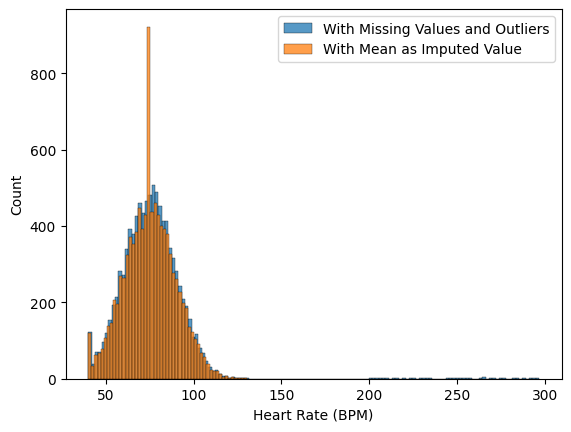

In [412]:
sns.histplot(smartwatch['Heart Rate (BPM)'], label ='With Missing Values and Outliers')
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label = 'With Mean as Imputed Value')
plt.legend()

**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

ANSWER: There is a small change between the median values where the imputed table's HR median is slightly higher than the original this is because we imputed the missing and high outlier values with the mean values shifting the median towrds the value of the mean value. Since there were many values replaced the median equals the mean

In [413]:
## coding cell to check the difference in median values 
print(smartwatch_hr['Heart Rate (BPM)'].median())
print(smartwatch['Heart Rate (BPM)'].median())
print(smartwatch_hr['Heart Rate (BPM)'].mean())

75.13268404820141
75.22060125775644
75.13268404820141


Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [414]:
minBloodO2 = smartwatch['Blood Oxygen Level (%)'].min()

maxBloodO2 = smartwatch['Blood Oxygen Level (%)'].max()

meanBloodO2 = smartwatch['Blood Oxygen Level (%)'].mean()

print(minBloodO2, maxBloodO2, meanBloodO2)

90.79120814564097 100.0 97.84158102099076


In [415]:
grader.check('q4')

Question 4 results: All test cases passed!

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

<Axes: ylabel='Blood Oxygen Level (%)'>

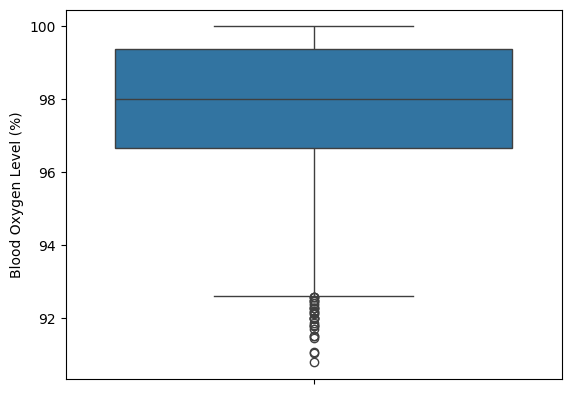

In [416]:
sns.boxplot(smartwatch['Blood Oxygen Level (%)'])

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

ANSWER: The outliers had no patterns to explain why most ranged from 90-92% and some individuals had other varibles that would contradict a low oxegen level indicating the values could be wrong, therefore we are removing the outliers. This is reasonable since it is a low percent(.3%) of the dataset and will not effect much. The missing values make up only 3% of the data and seem to be missing completely at random therfore we can remove them but to perserve data we can impute the data by the median (since the data is scewed).

After trying to question 8 i found out deleting any values will not let me pass the test therefore we can impute missing values or windsorize outliers that were deleted to perserve values.Outliars will be replaced with second smallest min because most outliers are crossing the lower fence.


300
9700
0.03
92.59243805432556
103.44642433074375
length 30
      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
389    4991.0         89.812696               92.003999   3197.915998   
548    1833.0         78.880652               92.109389   2274.291267   
773    3914.0         74.337231               92.288167   2482.815316   
859    2388.0         43.259383               92.482382    994.697587   
944    3703.0         84.058395               91.062167   9390.095074   
1129   4579.0         72.291005               92.577289    158.463338   
1179   3692.0         89.396977               91.507534   2790.919612   
1778   1395.0         74.038855               92.483740           NaN   
2263   1425.0         43.767314               92.282996   3069.225843   
2316   2265.0        102.533707               91.514026   1015.818664   
2443   3253.0         52.514029               92.368105   3488.384199   
2698   3113.0         78.345556               91.034463  15758.

97.84377863826286


/tmp/ipykernel_234060/2882461055.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_bol['Blood Oxygen Level (%)'] = smartwatch_hr['Blood Oxygen Level (%)'].median()
/tmp/ipykernel_234060/2882461055.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_bol['Blood Oxygen Level (%)'] = smartwatch_hr['Blood Oxygen Level (%)'].nsmallest(2).iloc[-1] # python second minimum pandas Ai overview


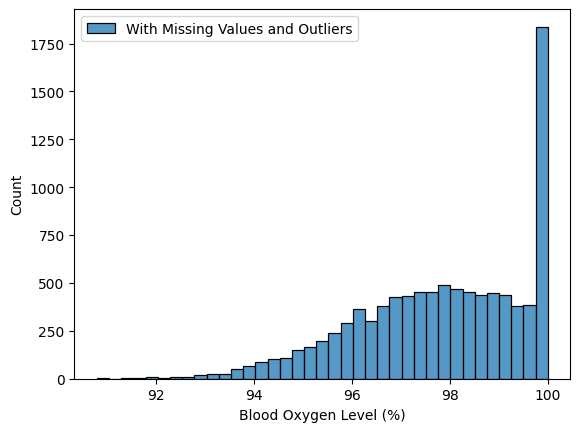

In [417]:
## use this space or additional cells to deal with the missing/outlier values. 
print(len(smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'].isnull()]))
print(len(smartwatch_hr[~smartwatch_hr['Blood Oxygen Level (%)'].isnull()]))
print((len(smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'].isnull()]))/len(smartwatch_hr))

## "Boxplot with outliers. The upper and 
# lower fences represent values more and 
# less than 75th and 25th percentiles 
# (3rd and 1st quartiles), respectively, 
# by 1.5 times the difference between the 
# 3rd and 1st quartiles. An outlier is defined 
# as the value above or below the upper or lower fences."

q1 = smartwatch_hr['Blood Oxygen Level (%)'].quantile(0.25)
q3 = smartwatch_hr['Blood Oxygen Level (%)'].quantile(0.75)
iqr = q3 - q1

low_fence = q1 - (1.5 * iqr)
print(low_fence)
up_fence = q3 + (1.5 * iqr)
print(up_fence)

outlier_bol = smartwatch_hr[(smartwatch_hr['Blood Oxygen Level (%)'] > up_fence) | (smartwatch_hr['Blood Oxygen Level (%)'] < low_fence)]
up_outlier = smartwatch_hr[(smartwatch_hr['Blood Oxygen Level (%)'] > up_fence)]
#print(up_outlier)
print("length " + str(len(outlier_bol)))
print(outlier_bol)

null_bol = smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'].isnull()]
print(null_bol)

print("total outlier and missing:")
print((len(null_bol) + len(outlier_bol)))
print((len(null_bol) + len(outlier_bol))/len(smartwatch_hr))

smartwatch_o2 = smartwatch_hr[
    (~smartwatch_hr['Blood Oxygen Level (%)'].isnull()) & 
    (smartwatch_hr['Blood Oxygen Level (%)'] <= up_fence) & 
    (smartwatch_hr['Blood Oxygen Level (%)'] >= low_fence)
    ]
print(smartwatch_o2["Blood Oxygen Level (%)"].mean())
null_bol['Blood Oxygen Level (%)'] = smartwatch_hr['Blood Oxygen Level (%)'].median()
outlier_bol['Blood Oxygen Level (%)'] = smartwatch_hr['Blood Oxygen Level (%)'].nsmallest(2).iloc[-1] # python second minimum pandas Ai overview
smartwatch_o2 = pd.concat([smartwatch_o2, null_bol, outlier_bol])
print(smartwatch_o2)

sns.histplot(smartwatch_hr["Blood Oxygen Level (%)"], label ='With Missing Values and Outliers')
plt.legend()
print(float(smartwatch_o2["Blood Oxygen Level (%)"].mean()))

Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

In [418]:
minSteps = float(smartwatch_hr['Step Count'].min())

maxSteps = float(smartwatch_hr['Step Count'].max())

meanSteps = float(smartwatch_hr['Step Count'].mean())

minSteps, maxSteps, meanSteps

(0.9101380609604088, 62486.690753464914, 6985.685884992229)

In [419]:
grader.check('q6')

Question 6 results: All test cases passed!

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

ANSWER: 
There are only 99 missing values (about 1% of dataset) and no clear pattern can be seen to why the data is missing, therefore we can delete the values. There are 446 outliers which is a lot outliers and these seem to be extreme values such as 38831 and 29066 yet other varbles of these outliers are in a normal range, therefore we will Winsorize the data to
to preserve information and distrabution. The outliers seem to only range out the upper fence since -9534.75 is the lower fence therefore we should replace the values with the largest non outlier value

After trying to question 8 i found out deleting any values will not let me pass the test therefore we can impute missing values or windsorize outliers that were deleted to perserve values. Here instead of deleting the missing value

100
9900
0.01
low -9534.755177832692
high 21280.697714543152
length 446
      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
3983   1597.0         75.132684               99.396872  23860.187292   
4185   4643.0         75.132684               95.415588  54698.646371   
6974   1935.0         75.132684               94.263021  25043.512031   
535    1684.0         75.132684               98.296101  24129.722791   
825    1633.0         75.132684               95.532636  37322.098277   
...       ...               ...                     ...           ...   
3247   1243.0         96.056554               98.010642  28675.878751   
4186      NaN         62.297438               98.010642  32620.520990   
7954   4266.0         84.291371               98.010642  28778.909788   
8165   3105.0         81.445776               98.010642  23743.422603   
8433   2735.0         85.419817               98.010642  23965.893681   

     Sleep Duration (hours) Activity Level Stress L

/tmp/ipykernel_234060/2556848012.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_step['Step Count'] = smartwatch_steps['Step Count'].max();
/tmp/ipykernel_234060/2556848012.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_step['Step Count'] = smartwatch_steps['Step Count'].median();


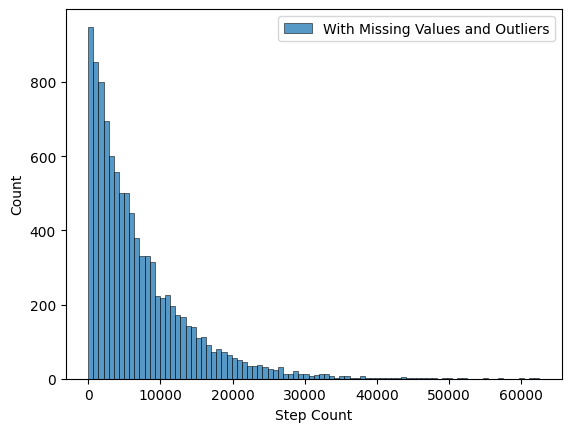

In [420]:
## use this space or additional cells to address the missing or outlier data.

print(len(smartwatch_o2[smartwatch_o2['Step Count'].isnull()]))
print(len(smartwatch_o2[~smartwatch_o2['Step Count'].isnull()]))
print((len(smartwatch_o2[smartwatch_o2['Step Count'].isnull()]))/len(smartwatch_o2))

q1 = smartwatch_o2['Step Count'].quantile(0.25)
q3 = smartwatch_o2['Step Count'].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - (1.5 * iqr)
print("low " + str(low_fence))
up_fence = q3 + (1.5 * iqr)
print("high " + str(up_fence))

outlier_step = smartwatch_o2[(smartwatch_o2['Step Count'] > up_fence) | (smartwatch_o2['Step Count'] < low_fence)]
up_step = smartwatch_o2[(smartwatch_o2['Step Count'] > up_fence)]
#print(up_outlier)
print("length " + str(len(outlier_step)))
print(outlier_step)

null_step = smartwatch_o2[smartwatch_o2['Step Count'].isnull()]
print("total outlier and missing:")
print((len(null_step) + len(outlier_step)))
print((len(null_step) + len(outlier_step))/len(smartwatch_o2))

smartwatch_steps = smartwatch_o2[
    (~smartwatch_o2['Step Count'].isnull()) & 
    (smartwatch_o2['Step Count'] <= up_fence) & 
    (smartwatch_o2['Step Count'] >= low_fence)
]
outlier_step['Step Count'] = smartwatch_steps['Step Count'].max();
null_step['Step Count'] = smartwatch_steps['Step Count'].median();
print(outlier_step)
print(smartwatch_steps['Step Count'].mean())
smartwatch_steps = pd.concat([smartwatch_steps, outlier_step, null_step])
print(smartwatch_steps['Step Count'].mean())

smartwatch_steps

sns.histplot(smartwatch_o2["Step Count"], label ='With Missing Values and Outliers')
plt.legend()


Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [421]:
minSleep = smartwatch['Sleep Duration (hours)'].min()

minSleep

TypeError: '<=' not supported between instances of 'str' and 'float'

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [ ]:
for item in smartwatch['Sleep Duration (hours)'].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(item)  ## first try to see if it can be converted to a number
    except:
        print(item)  ## if it can't be converted print it to screen 

ERROR


So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [ ]:
errorTable = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] == 'ERROR']
errorTable

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,75.132684,97.052954,2826.521994,ERROR,Highly Active,5
9438,4411.0,75.132684,99.524016,11209.020829,ERROR,Highly Active,3
1262,4465.0,75.132684,97.113032,51.448103,ERROR,Highly_Active,6
2039,1492.0,75.132684,98.223658,7741.843501,ERROR,Highly_Active,5
2543,4441.0,75.132684,100.000000,12917.213806,ERROR,Sedentary,6
...,...,...,...,...,...,...,...
9943,2961.0,91.834863,96.145378,21278.851963,ERROR,Active,4
8642,3476.0,75.132684,99.462778,4634.537130,ERROR,Active,3
1456,2997.0,54.116580,95.631824,4634.537130,ERROR,Active,1
4349,2677.0,73.357223,95.335209,4634.537130,ERROR,Sedentary,1


Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [ ]:
errorTable['Sleep Duration (hours)'] = np.nan

errorTable

/tmp/ipykernel_234060/2302362292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,75.132684,97.052954,2826.521994,NaN,Highly Active,5
9438,4411.0,75.132684,99.524016,11209.020829,NaN,Highly Active,3
1262,4465.0,75.132684,97.113032,51.448103,NaN,Highly_Active,6
2039,1492.0,75.132684,98.223658,7741.843501,NaN,Highly_Active,5
2543,4441.0,75.132684,100.000000,12917.213806,NaN,Sedentary,6
...,...,...,...,...,...,...,...
9943,2961.0,91.834863,96.145378,21278.851963,NaN,Active,4
8642,3476.0,75.132684,99.462778,4634.537130,NaN,Active,3
1456,2997.0,54.116580,95.631824,4634.537130,NaN,Active,1
4349,2677.0,73.357223,95.335209,4634.537130,NaN,Sedentary,1


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [ ]:
## create a copy of the table 
smartwatch_sleep = smartwatch_steps

smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')

smartwatch_sleep

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2,1860.0,75.132684,97.052954,2826.521994,NaN,Highly Active,5
337,2369.0,75.132684,95.441773,2998.761919,6.670622,Highly Active,9
393,2443.0,75.132684,95.497181,1227.804688,5.185245,Highly_Active,9
403,3200.0,75.132684,96.011492,9402.746140,7.190063,Highly_Active,9
595,2129.0,75.132684,97.161853,2555.402184,5.928628,Highly Active,7
...,...,...,...,...,...,...,...
9121,NaN,54.793814,99.670176,4634.537130,6.686431,Seddentary,2
9191,4516.0,101.777396,100.000000,4634.537130,8.079895,Active,10
9565,4495.0,90.411615,95.009355,4634.537130,8.582820,Sedentary,4
1509,4719.0,107.126196,98.010642,4634.537130,7.213924,Sedentary,2


Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

In [ ]:
minSleep = float(smartwatch_sleep['Sleep Duration (hours)'].min())

maxSleep = float(smartwatch_sleep['Sleep Duration (hours)'].max())

meanSleep = float(smartwatch_sleep['Sleep Duration (hours)'].mean())

minSleep, maxSleep, meanSleep

(-0.1944527906201543, 12.140232872862926, 6.505462918406444)

In [ ]:
grader.check('q8')

Question 8 results: All test cases passed!

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

ANSWER: There are 45 outliers and 397 missing values. Since as we learned before with question 8 deleting values will change future analysis of this data set we can perserve the values by imputing the missing values with the mean as the data is a normally distrubuted and windsorizing the outliars where the lower values will be replaced with the second lowest and the higher values will be replaced with the highest value that are not outliers so that the data can be as simlar to the orginal values. We can impute and windsorize because no clear pattern is shown to why they are outliers or null values and deletion would not work since the deletion will reduce the dataset by more than 4%

397
9603
0.0397
low 2.440514741133737
high 10.582662682074801
length 45
      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
295    3432.0         68.374374               99.941652    877.602554   
384    1403.0         59.511764               98.532708   2763.666657   
459    1658.0         65.173266               97.361383    960.362774   
577    4691.0         73.656778              100.000000   2044.688131   
1058   1487.0         76.834638              100.000000   3952.829137   
1164   2969.0         71.510970              100.000000   2141.902659   
1534   1711.0         69.870240               96.175940  13078.815233   
1729   4675.0         92.269195               98.790525   9681.145639   
1886   1186.0         63.819276              100.000000   2663.352162   
2133   4401.0         91.964082               97.171460    652.741730   
2137   3265.0         79.173895              100.000000   1492.374172   
2400   1933.0         46.363033               99.736

/tmp/ipykernel_234060/3720473913.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_sleep_up['Sleep Duration (hours)'] = smartwatch_updated_sleep['Sleep Duration (hours)'].max();
/tmp/ipykernel_234060/3720473913.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_sleep_low['Sleep Duration (hours)'] = smartwatch_updated_sleep['Sleep Duration (hours)'].nsmallest(2).iloc[-1];
/tmp/ipykernel_234060/3720473913.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
337,2369.0,75.132684,95.441773,2998.761919,6.670622,Highly Active,9
393,2443.0,75.132684,95.497181,1227.804688,5.185245,Highly_Active,9
403,3200.0,75.132684,96.011492,9402.746140,7.190063,Highly_Active,9
595,2129.0,75.132684,97.161853,2555.402184,5.928628,Highly Active,7
649,2008.0,75.132684,98.356789,2739.171166,7.272010,Highly_Active,NaN
...,...,...,...,...,...,...,...
8642,3476.0,75.132684,99.462778,4634.537130,6.506413,Active,3
1456,2997.0,54.116580,95.631824,4634.537130,6.506413,Active,1
4349,2677.0,73.357223,95.335209,4634.537130,6.506413,Sedentary,1
5177,2997.0,70.484333,97.615592,4634.537130,6.506413,Actve,1


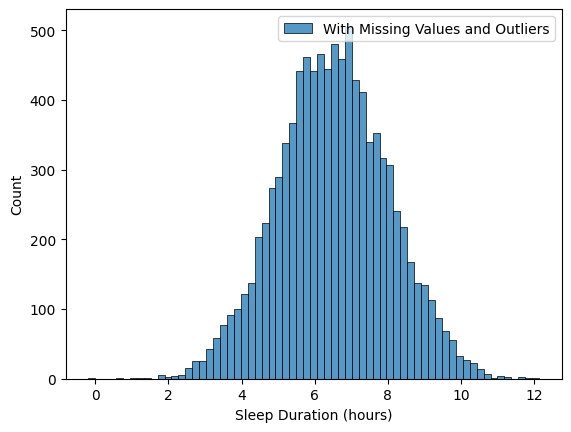

In [ ]:
## use this space or additional cells to address the missing or outlier data. 

print(len(smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'].isnull()]))
print(len(smartwatch_sleep[~smartwatch_sleep['Sleep Duration (hours)'].isnull()]))
print((len(smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'].isnull()]))/len(smartwatch_sleep))

q1 = smartwatch_sleep['Sleep Duration (hours)'].quantile(0.25)
q3 = smartwatch_sleep['Sleep Duration (hours)'].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - (1.5 * iqr)
print("low " + str(low_fence))
up_fence = q3 + (1.5 * iqr)
print("high " + str(up_fence))

outlier_sleep = smartwatch_sleep[(smartwatch_sleep['Sleep Duration (hours)'] > up_fence) | (smartwatch_sleep['Sleep Duration (hours)'] < low_fence)]
up_sleep = smartwatch_sleep[(smartwatch_sleep['Sleep Duration (hours)'] > up_fence)]
#print(up_outlier)
print("length " + str(len(outlier_sleep)))
print(outlier_sleep)

outlier_sleep_up = smartwatch_sleep[(smartwatch_sleep['Sleep Duration (hours)'] > up_fence)]

outlier_sleep_low = smartwatch_sleep[(smartwatch_sleep['Sleep Duration (hours)'] < low_fence)]

null_sleep = smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'].isnull()]
print(null_sleep)
print("total outlier and missing:")
print((len(null_sleep) + len(outlier_sleep)))
print((len(null_sleep) + len(outlier_sleep))/len(smartwatch_sleep))

smartwatch_updated_sleep = smartwatch_sleep[
    (~smartwatch_sleep['Sleep Duration (hours)'].isnull()) & 
    (smartwatch_sleep['Sleep Duration (hours)'] <= up_fence) & 
    (smartwatch_sleep['Sleep Duration (hours)'] >= low_fence)
]
outlier_sleep_up['Sleep Duration (hours)'] = smartwatch_updated_sleep['Sleep Duration (hours)'].max();
outlier_sleep_low['Sleep Duration (hours)'] = smartwatch_updated_sleep['Sleep Duration (hours)'].nsmallest(2).iloc[-1];
null_sleep['Sleep Duration (hours)'] = smartwatch_updated_sleep['Sleep Duration (hours)'].mean();
print(outlier_sleep)
print(smartwatch_updated_sleep['Sleep Duration (hours)'].mean())
smartwatch_updated_sleep = pd.concat([smartwatch_updated_sleep, outlier_sleep_low, outlier_sleep_up, null_sleep])
print(smartwatch_updated_sleep['Sleep Duration (hours)'].mean())

sns.histplot(smartwatch_sleep["Sleep Duration (hours)"], label ='With Missing Values and Outliers')
#sns.histplot(smartwatch_o2["Blood Oxygen Level (%)"], label = 'With Mean as Imputed Value')
plt.legend()


len(smartwatch_updated_sleep)
smartwatch_updated_sleep

We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [ ]:
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        int(item)
    except:
        print(item)

nan
Very High


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

ANSWER:We will replace very high with 8 since it indicates a reasonably high stress level.

In [ ]:
## cell to deal with 'Very High' value
highTable = smartwatch_updated_sleep[smartwatch_updated_sleep['Stress Level'] == 'Very High']

highTable['Stress Level'] = 10

smartwatch_stress = smartwatch_updated_sleep[(smartwatch_updated_sleep['Stress Level'] != 'Very High') & (~smartwatch_updated_sleep['Stress Level'].isnull())]

smartwatch_stress = pd.concat([smartwatch_stress, highTable])
print(smartwatch_stress)


      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
337    2369.0         75.132684               95.441773   2998.761919   
393    2443.0         75.132684               95.497181   1227.804688   
403    3200.0         75.132684               96.011492   9402.746140   
595    2129.0         75.132684               97.161853   2555.402184   
1195   3261.0         75.132684               99.652006   2867.872064   
...       ...               ...                     ...           ...   
4713   1556.0         91.216912               98.777090  21278.851963   
5175   2681.0         83.416616               95.620551  21278.851963   
2403   2980.0         86.049161               97.042221   4634.537130   
1700   1777.0         63.996994               95.465595  14088.912805   
2421   4380.0         96.907879               97.099425    319.741554   

      Sleep Duration (hours) Activity Level Stress Level  
337                 6.670622  Highly Active            9  
393  

/tmp/ipykernel_234060/2404448865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highTable['Stress Level'] = 10


Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [ ]:
smartwatch['Activity Level'].unique()

array(['Highly Active', 'Highly_Active', 'Actve', 'Seddentary',
       'Sedentary', 'Active', nan], dtype=object)

**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`



In [ ]:
## Highly Active 
highlyActive = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Highly_Active') | (smartwatch_stress['Activity Level'] == 'Highly Active')]  ## Pull out rows for two unique values matching highly active
highlyActive['Activity Level'] = 'Highly_Active'  ## Reset the text in the column to either 'Highly Active'
highlyActive['NumActivity'] = 1 ## set the number for the numerical value 


## Active
active = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Active') | (smartwatch_stress['Activity Level'] == 'Actve')]
active['Activity Level'] = 'Active'
active['NumActivity'] = 2

## Sedentary 
sedentary = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Sedentary') | (smartwatch_stress['Activity Level'] == 'seddentary')]
sedentary['Activity Level'] = 'Sedentary'
sedentary['NumActivity'] = 3


final_table = pd.concat([highlyActive, active, sedentary, smartwatch_stress[smartwatch_stress['Activity Level'].isnull()]])
print(final_table)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
337    2369.0         75.132684               95.441773   2998.761919   
393    2443.0         75.132684               95.497181   1227.804688   
403    3200.0         75.132684               96.011492   9402.746140   
595    2129.0         75.132684               97.161853   2555.402184   
3451   2768.0         75.132684               96.761963   4723.116194   
...       ...               ...                     ...           ...   
2137   3265.0         79.173895              100.000000   1492.374172   
2400   1933.0         46.363033               99.736804   1510.900469   
4069   2577.0         65.201322               99.484801   2240.504798   
4596   3501.0         76.063875               96.130100  12510.840514   
8059   3895.0         78.398919              100.000000   2522.668511   

      Sleep Duration (hours) Activity Level Stress Level  NumActivity  
337                 6.670622  Highly_Active        

/tmp/ipykernel_234060/1968880481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['Activity Level'] = 'Highly_Active'  ## Reset the text in the column to either 'Highly Active'
/tmp/ipykernel_234060/1968880481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['NumActivity'] = 1 ## set the number for the numerical value
/tmp/ipykernel_234060/1968880481.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

In [ ]:
final_table.isnull().sum()

User ID                    161
Heart Rate (BPM)             0
Blood Oxygen Level (%)       0
Step Count                   0
Sleep Duration (hours)       0
Activity Level             197
Stress Level                 0
NumActivity               1817
dtype: int64

Then let's use the info function to make sure each column has the data type we're expecting. 

In [ ]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8159 entries, 337 to 8059
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 7998 non-null   float64
 1   Heart Rate (BPM)        8159 non-null   float64
 2   Blood Oxygen Level (%)  8159 non-null   float64
 3   Step Count              8159 non-null   float64
 4   Sleep Duration (hours)  8159 non-null   float64
 5   Activity Level          7962 non-null   object 
 6   Stress Level            8159 non-null   object 
 7   NumActivity             6342 non-null   float64
dtypes: float64(6), object(2)
memory usage: 573.7+ KB


**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

ANSWER:
There seems to be no correlation between Heart Rate (BPM) and Sleep Duration, although most points seem to be around the Heart Rate of 68.

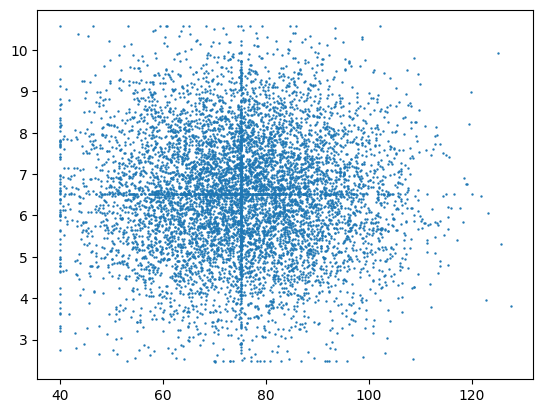

In [ ]:
plt.scatter(final_table['Heart Rate (BPM)'], final_table['Sleep Duration (hours)'], s=.5)

**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

ANSWER:
The first figure looks more spread out and there is less of a pattern seen with the points. This could mean that the first figure is more varied

In [ ]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')

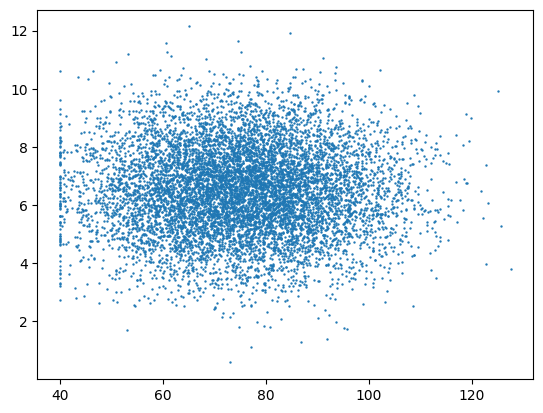

In [ ]:
plt.scatter(nanTable['Heart Rate (BPM)'], nanTable['Sleep Duration (hours)'], s=.5)

**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 

Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

<Axes: xlabel='Activity Level', ylabel='Step Count'>

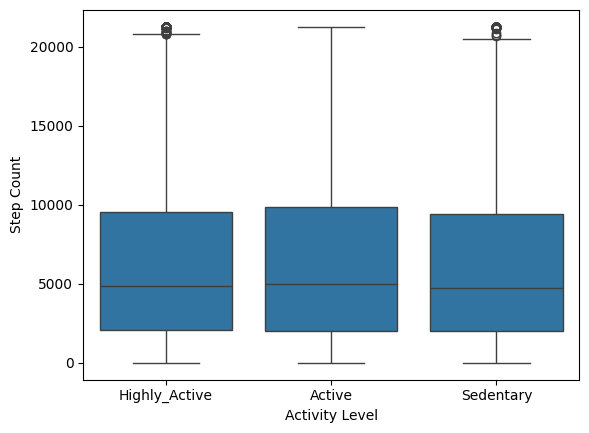

In [422]:
## Visualization 
sns.boxplot(x='Activity Level', y='Step Count', data=final_table)


In [423]:
from scipy.stats import f_oneway

## create a table for each activity level group
sed = final_table[final_table['Activity Level'] == 'Sedentary']  ## sedentary rows
act = final_table[final_table['Activity Level'] == 'Active'] ## active rows
hact = final_table[final_table['Activity Level'] == 'Highly_Active'] ## highly active rows 

stat, pval = f_oneway(sed['Step Count'], act['Step Count'], hact['Step Count'])


print(f"ANOVA test statistic: {stat:.3f}, p-value: {pval:.3f}")


ANOVA test statistic: 0.585, p-value: 0.557


Is there significant difference between the groups' step counts?  

ANSWER:
No, because the p-value is 0.557 which is greater than the significant threshold of .05 and in the historgram we see that the step counts are similar to each other between groups.

**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

ANSWER:
Some findings were there seems to be no correlation between sleep duration and heart rate, and there is no big diffrence between activity groups and step counts. These are intresting findings. In order to communicate these findings responsibly we need to communicate that we should consider more context and research into these findings rather than taking them as fact since these findings do not sound accurate and if they are true we need to understand it more. Additionally, we should also talk about how we cleaned the data and how missing and outlier values may make some varibles less accurate.

To avoid misinterpreting data we need to also think about the cofounds of our findings such as since there are no correlations found during sleep duration and heart rate we might consider if the watch was on during the sleep. We should also think about how the data was collected on each varible whether people inputed some of the data or if the smartwatch measured everything is important so that we can understand possible reasonings for outliers and missing values. To avoid biases we need to find out the reasonings for missing data and outliers. If patterns are found they must not be deleted and need to be researched, perhaps in seperate table
